
## __*TP2 : Apprentissage supervis√© - Random Forest*__

<br>

#### __Exercice 1: Classification avec des For√™ts Al√©atoires__

* Objectif : Dans cet exercice, `vous utiliserez des for√™ts al√©atoires pour classer des donn√©es sur des fleurs`   
en diff√©rentes cat√©gories.

* __Donn√©es : Nous utiliserons le jeu de donn√©es Iris, qui contient des mesures de diff√©rentes caract√©ristiques  
de trois esp√®ces de fleurs. Vous pouvez le charger en utilisant scikit-learn.__

<br>

__Instructions :__

* Importez les biblioth√®ques n√©cessaires, y compris scikit-learn. 
* Chargez le jeu de donn√©es Iris. 
* Divisez les donn√©es en un ensemble d'entra√Ænement et un ensemble de test. 
* Cr√©ez un mod√®le de for√™t al√©atoire avec les param√®tres par d√©faut.
* Entra√Ænez le mod√®le sur l'ensemble d'entra√Ænement.
* Faites des pr√©dictions sur l'ensemble de test.
* √âvaluez les performances du mod√®le en utilisant des mesures telles que la pr√©cision, le rappel et la F-mesure.
* Exp√©rimentez en ajustant les hyperparam√®tres du mod√®le (par exemple, le nombre d'arbres, la profondeur

<br>

__*1. Importez les biblioth√®ques n√©cessaires, y compris scikit-learn.* ‚úÖ__  
__*2. Chargez le jeu de donn√©es Iris.* ‚úÖ__

In [1]:
# R√©f√©rance:
      # https://medium.com/ai-does-it-better/import-csv-data-into-scikit-learn-for-machine-learning-2d2f5c18f100

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report




df = pd.read_csv("iris.csv")
print(df.head(5))



   sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa


<br>
<br>

__*3. Divisez les donn√©es en un ensemble d'entra√Ænement et un ensemble de test*.‚úÖ__ 

In [3]:
# R√©f√©rance:
      # https://builtin.com/data-science/train-test-split#:~:text=Train%20test%20split%20is%20a%20machine%20learning%20technique%20that%20divides,performs%20well%20on%20unseen%20data.
      # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


# les features (X) et la cible (y)
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = y = df['variety']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


print("\nles features :\n", X.head(5))
print("\n\nla cible :", y.head(5))


les features :
    sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


la cible : 0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object


__- Ensemble de donn√© de train__

In [4]:
print("\n\nLes donn√©e de X_train\n\n", X_train)
print("\n\n\nLes donn√©e de y_train\n\n", y_train)




Les donn√©e de X_train

      sepal.length  sepal.width  petal.length  petal.width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[100 rows x 4 columns]



Les donn√©e de y_train

 96     Versicolor
105     Virginica
66     Versicolor
0          Setosa
122     Virginica
          ...    
71     Versicolor
106     Virginica
14         Setosa
92     Versicolor
102     Virginica
Name: variety, Length: 100,

<br>

__- Ensemble de donn√© de test__

In [5]:
print("\n\nLes donn√©e de X_test\n\n", X_test.head(10))
print("\n\nLes donn√©e de Y_test\n\n", y_test.head(10))



Les donn√©e de X_test

      sepal.length  sepal.width  petal.length  petal.width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
31            5.4          3.4           1.5          0.4
64            5.6          2.9           3.6          1.3
141           6.9          3.1           5.1          2.3
68            6.2          2.2           4.5          1.5
82            5.8          2.7           3.9          1.2


Les donn√©e de Y_test

 73     Versicolor
18         Setosa
118     Virginica
78     Versicolor
76     Versicolor
31         Setosa
64     Versicolor
141     Virginica
68     Versicolor
82     Versicolor
Name: variety, dtype: object


<br>
<br>

__*4. Cr√©ez un mod√®le de for√™t al√©atoire avec les param√®tres par d√©faut*.‚úÖ__

In [6]:
# R√©f√©rance
    # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    # https://www.stat4decision.com/fr/foret-aleatoire-avec-python/
    # https://kwamimayeden.com/la-foret-aleatoire-random-forest-en-machine-learning/
    # https://www.geeksforgeeks.org/dsa/random-forest-classifier-using-scikit-learn/


classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


<br>
<br>


__*5. √âvaluez les performances du mod√®le en utilisant des mesures telles que la pr√©cision, le rappel et la F-mesure*.‚úÖ__


Accuracy:
 98.0 %

Confusion Matrice: 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]

Classification Report: 
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



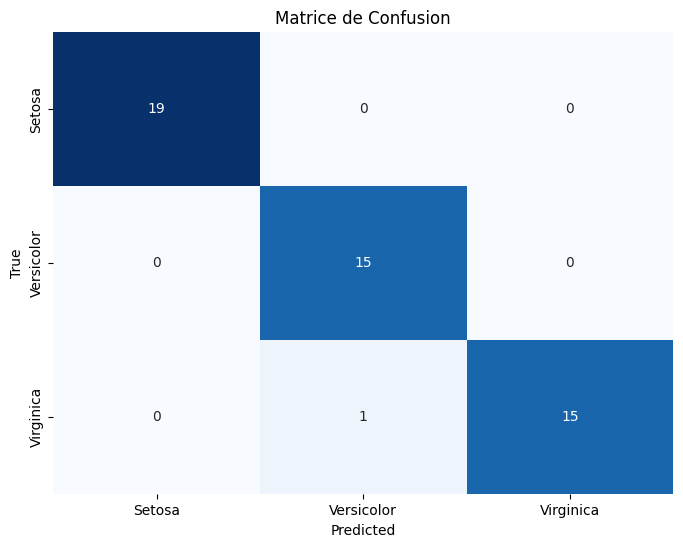

In [7]:
acc = accuracy_score(y_test,y_pred)*100
print("\nAccuracy:\n",round(acc,2),"%")

conf_matrice = confusion_matrix(y_test,y_pred)
print("\nConfusion Matrice:","\n",conf_matrice)

rapport = classification_report(y_test,y_pred)
print("\nClassification Report:","\n",rapport)



plt.figure(figsize=(8,6))
class_names = sorted(y_test.unique())
sns.heatmap(
        conf_matrice, 
        annot=True, 
        fmt='g', 
        cmap='Blues', 
        cbar=False, 
        xticklabels= class_names,
        yticklabels= class_names
)
plt.title("Matrice de Confusion")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

<br>
<br>


__*6. Exp√©rimentez en ajustant les hyperparam√®tres du mod√®le (par exemple, le nombre d'arbres, la profondeur*.‚úÖ__  
<br>

__*7. √âvaluez les performances du mod√®le en utilisant des mesures telles que la
pr√©cision, le rappel et la F-mesure*.‚úÖ__


__*8. Exp√©rimentez en ajustant les hyperparam√®tres du mod√®le (par exemple, le
nombre d'arbres, la profondeur*.‚úÖ__

In [8]:
# R√©ference : 
     # https://medium.com/@kalpit.sharma/mastering-random-forest-hyperparameter-tuning-for-enhanced-machine-learning-models-2d1a8c6c426f
     # https://pub.aimind.so/fine-tuning-random-forest-a-guide-to-refining-hyperparameters-for-maximum-accuracy-1ffe46d11da2
     # https://www.kaggle.com/code/nargisbegum82/hyperparameter-tuning-in-random-forests



class_tuned = RandomForestClassifier(
        n_estimators=200,
        max_depth=30,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        criterion='gini',
        class_weight=None,
        random_state=42
)


class_tuned.fit(X_train, y_train)
y_pred_tuned = class_tuned.predict(X_test)
print("Le rapport hyperparam√®tres :\n",classification_report(y_test, y_pred_tuned))



Le rapport hyperparam√®tres :
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       0.94      1.00      0.97        15
   Virginica       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



<br>
<br>
<br>


## __*Exercice 2 : Optimisation des For√™ts Al√©atoires*__

<br>

* `Objectif` : Dans cet exercice, vous `explorerez les techniques d'optimisation des for√™ts al√©atoires` pour am√©liorer les performances d'un mod√®le.

* __Donn√©es : Nous utiliserons le jeu de donn√©es CIFAR-10, qui contient 60 000 images r√©parties en 10 classes diff√©rentes.   
Vous pouvez le t√©l√©charger depuis la biblioth√®que torchvision de PyTorch.__

<br>

__- Instructions :__

* Importez les biblioth√®ques n√©cessaires, y compris `scikit-learn et PyTorch`.
<br>

* Chargez le jeu de donn√©es `CIFAR-10`.
* Pr√©traitez les donn√©es en les normalisant et en les divisant en ensembles d'entra√Ænement, de validation et de test.
* Cr√©ez un mod√®le de for√™t al√©atoire pour la classification des images. Vous
pouvez utiliser la classe `RandomForestClassifier` de scikit-learn.
* Entra√Ænez le mod√®le sur l'ensemble d'entra√Ænement et √©valuez ses  
performances sur l'ensemble de validation en utilisant une m√©trique de votre  
choix (par exemple, l'exactitude).
* Explorez `les hyperparam√®tres du mod√®le`, `tels que le nombre d'arbres`, 
`la profondeur maximale des arbres`, et `d'autres param√®tres pertinents`.   
Utilisez la recherche en grille ou la recherche al√©atoire pour trouver les meilleures
combinaisons d'hyper param√®tres qui am√©liorent les performances du mod√®le
sur l'ensemble de validation.
* Une fois que vous avez obtenu `les meilleurs hyperparam√®tres`, 
`√©valuez les performances du mod√®le sur l'ensemble de test`   
pour obtenir une estimation r√©aliste de ses performances en situation r√©elle.

<br>

__*1. Importez les biblioth√®ques n√©cessaires, y compris `scikit-learn et PyTorch`*.__

In [4]:
# R√©f√©rences :
# https://docs.pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://docs.pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html
# https://medium.com/@thatchawin.ler/cifar10-with-resnet-in-pytorch-a86fe18049df


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, train_test_split

<br>

__*2. Chargement du jeu de donn√©es `CIFAR-10`*.__

In [ ]:

transform = transforms.Compose([
        # J'ai utilis√© resize car les images sont trop grandes pour le CPU
    transforms.Resize((16, 16)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Charger CIFAR-10
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Fonction pour extraire les donn√©es
def extract_data(dataset):
    data = []
    labels = []
    for img, label in dataset:
        data.append(img.numpy().flatten())
        labels.append(label)
    return np.array(data, dtype=np.float32), np.array(labels)


X_train_full, y_train_full = extract_data(train_dataset)
X_test, y_test = extract_data(test_dataset)
print("Le nombre d'exemples d'entra√Ænement est :", X_train_full.shape[0])
print("Le nombre d'exemples de test est :", X_test.shape[0])
 

Le nombre d'exemples d'entra√Ænement est : 50000
Le nombre d'exemples de test est : 10000


<br>

__*3. Pr√©traitez les donn√©es en les normalisant et en les divisant en ensembles
d'entra√Ænement, de validation et de test.*.__ 

In [ ]:

# Sp√©paration des donn√©es en train et test
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.1,
    random_state=42,
    stratify=y_train_full
)

# pr√©traitement des donn√©es avec un StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


<br>

__*4. Cr√©ez un mod√®le de for√™t al√©atoire pour la classification des images. Vous
pouvez utiliser la classe RandomForestClassifier de scikit-learn*.__

In [7]:
# Implementation of Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)


<br>

__*5. Entra√Ænez le mod√®le sur l'ensemble d'entra√Ænement et √©valuez ses
performances sur l'ensemble de validation en utilisant une m√©trique de votre
choix (par exemple, l'exactitude)*.__

In [8]:

rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Pr√©cision sur l'ensemble de validation : {val_accuracy:.2f} %")


Pr√©cision sur l'ensemble de validation : 0.47 %


* __Le mod√®le de base classe correctement `environ 47 % des images sur l‚Äôensemble de validation`. Cela montre qu‚Äôil reconna√Æt certaines images, mais pas assez pour √™tre fiable.__

<br>

__*6. Explorez les hyperparam√®tres du mod√®le, tels que le nombre d'arbres, la
profondeur maximale des arbres, et d'autres param√®tres pertinents. Utilisez la
recherche en grille ou la recherche al√©atoire pour trouver les meilleures
combinaisons d'hyper param√®tres qui am√©liorent les performances du mod√®le
sur l'ensemble de validation.*.__

In [ ]:
# Hyperparam√®tres de recherche pour un mod√®le Random Forest
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grille de recherche
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nMeilleurs param√®tres :\n", grid_search.best_params_)
print(f"\nMeilleure pr√©cision moyenne (CV) : {grid_search.best_score_:.2f} %")

best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits

Meilleurs param√®tres :
 {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Meilleure pr√©cision moyenne (CV) : 0.46 %


* __`M√™me avec les meilleurs hyperparam√®tres, le mod√®le atteint seulement 46 % de pr√©cision, donc il n‚Äôam√©liore pas beaucoup le r√©sultat par rapport au mod√®le de base`.__

<br>

__*7. Une fois que vous avez obtenu les meilleurs hyperparam√®tres, √©valuez les
performances du mod√®le sur l'ensemble de test pour obtenir une estimation
r√©aliste de ses performances en situation r√©elle.*.__

In [10]:
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"\n‚úÖ Pr√©cision finale sur l'ensemble de test : {test_accuracy:.2f} %")



‚úÖ Pr√©cision finale sur l'ensemble de test : 0.47 %


              precision    recall  f1-score   support

    airplane       0.55      0.56      0.55      1000
  automobile       0.53      0.57      0.55      1000
        bird       0.38      0.33      0.35      1000
         cat       0.35      0.29      0.32      1000
        deer       0.42      0.39      0.40      1000
         dog       0.45      0.40      0.42      1000
        frog       0.48      0.58      0.53      1000
       horse       0.50      0.46      0.48      1000
        ship       0.57      0.61      0.59      1000
       truck       0.47      0.54      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



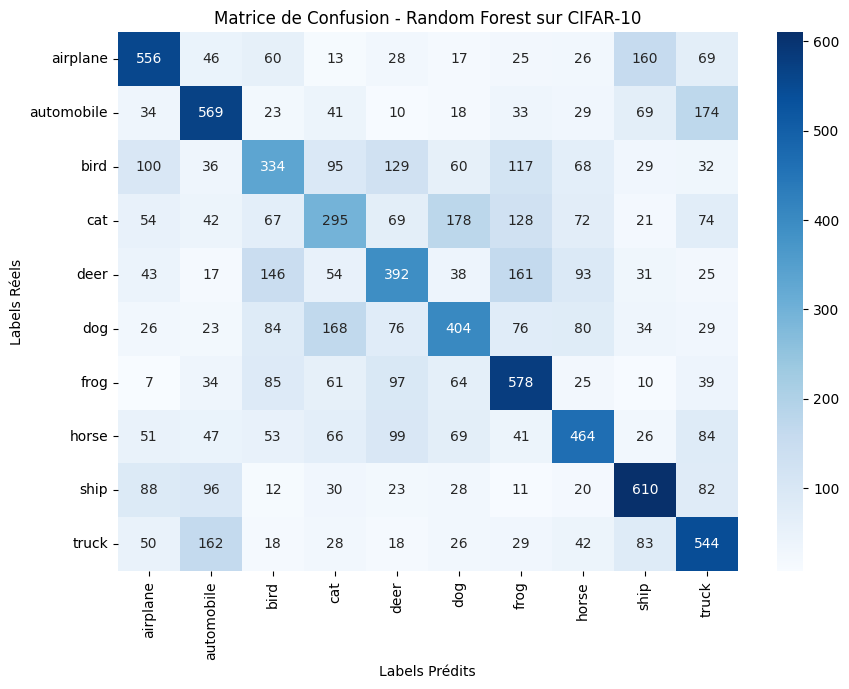

In [ ]:

# Affichage de matrice de confusion et classification report
print(classification_report(y_test, y_test_pred, target_names=train_dataset.classes))

conf_mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=train_dataset.classes,
    yticklabels=train_dataset.classes
)
plt.xlabel('Labels Pr√©dits')
plt.ylabel('Labels R√©els')
plt.title('Matrice de Confusion - Random Forest sur CIFAR-10')
plt.show()




<br>


## ü§î Conclusion

L‚Äôexp√©rimentation sur le jeu de donn√©es **CIFAR-10** avec un mod√®le de **For√™t Al√©atoire** montre que ce type de mod√®le est `limit√© face √† la complexit√© des images`, mais fournit tout de m√™me des r√©sultats exploitables.

### Hyperparam√®tres optimaux
Les meilleurs hyperparam√®tres trouv√©s gr√¢ce √† la recherche en grille sont :  
```python
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

```

### üìä R√©sultats obtenus

Exactitude sur l‚Äôensemble de validation : **47,48 %**

Exactitude sur l‚Äôensemble de test : **47,46 %**